In [ ]:
import pandas as pd
# Load the data
data = pd.read_csv("/content/LoanApprovalPrediction.csv")

# Display the first few rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

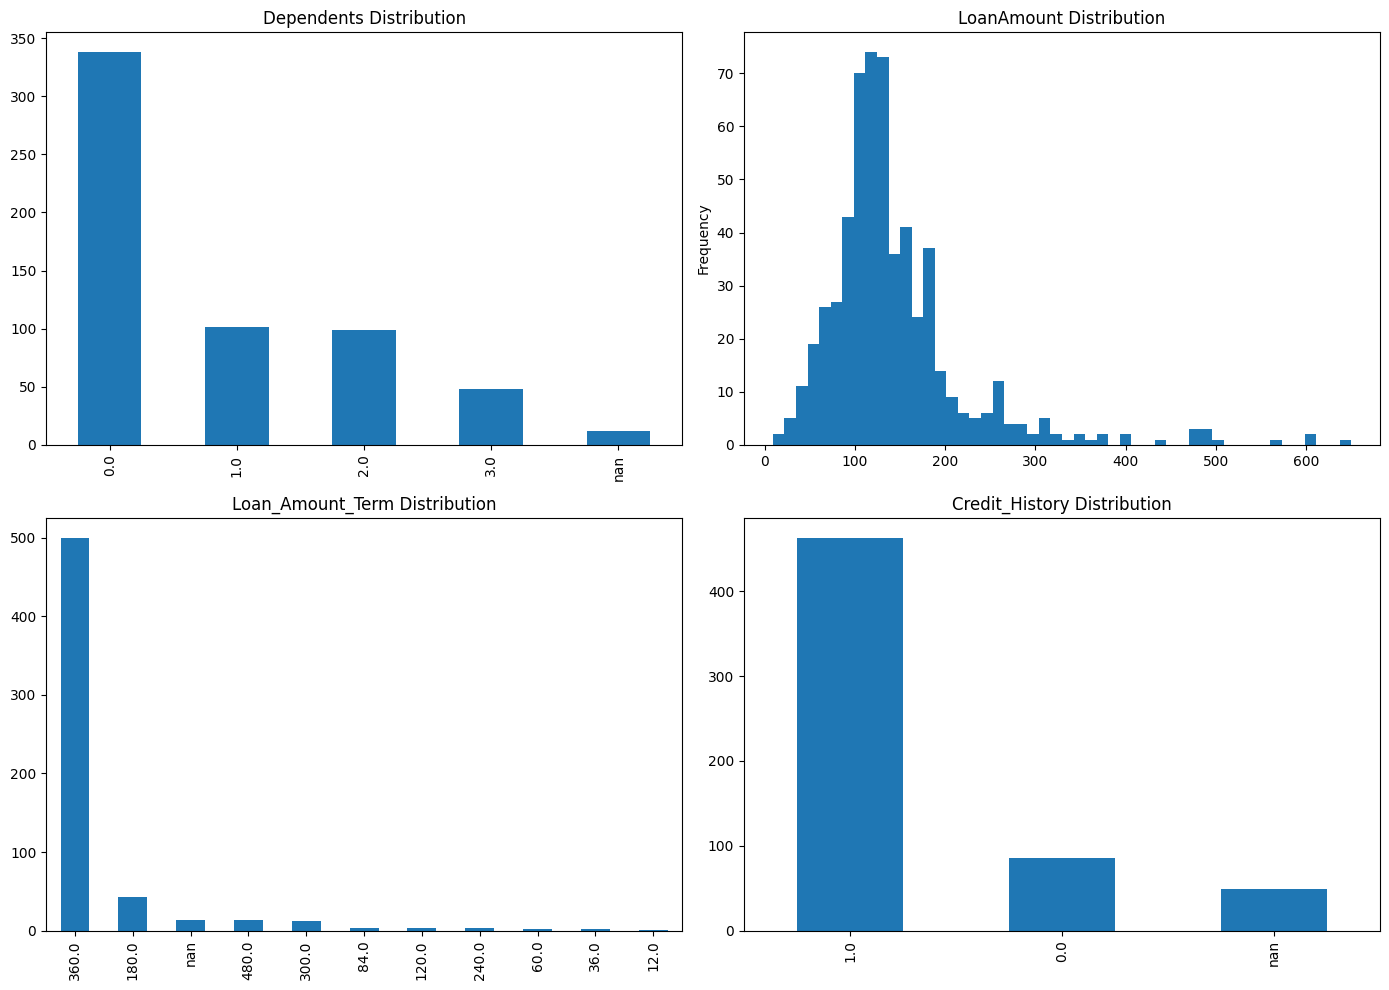

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distributions of columns with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Dependents distribution
data['Dependents'].value_counts(dropna=False).plot(kind='bar', ax=axes[0, 0], title='Dependents Distribution')

# LoanAmount distribution
data['LoanAmount'].plot(kind='hist', bins=50, ax=axes[0, 1], title='LoanAmount Distribution')

# Loan_Amount_Term distribution
data['Loan_Amount_Term'].value_counts(dropna=False).plot(kind='bar', ax=axes[1, 0], title='Loan_Amount_Term Distribution')

# Credit_History distribution
data['Credit_History'].value_counts(dropna=False).plot(kind='bar', ax=axes[1, 1], title='Credit_History Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Impute missing values based on the observations

# Impute 'Dependents' with mode
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

# Impute 'LoanAmount' with median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Impute 'Loan_Amount_Term' with mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Impute 'Credit_History' with mode
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Verify if missing values are imputed
missing_after_imputation = data.isnull().sum()

missing_after_imputation

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

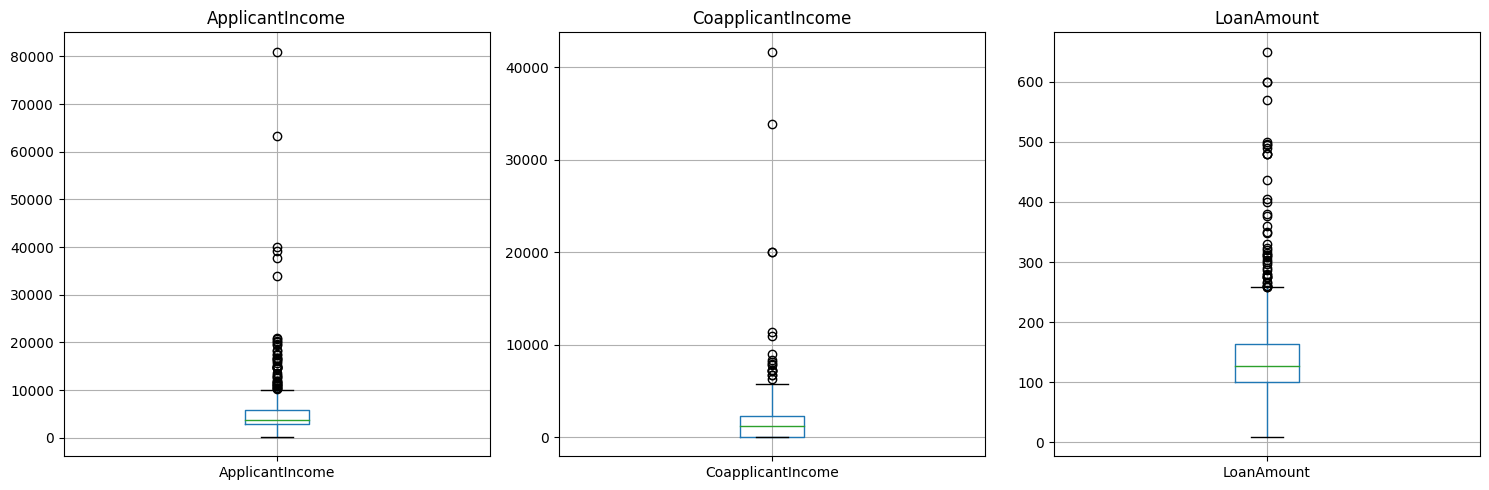

In [ ]:
# Plotting boxplots for numerical columns to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# ApplicantIncome distribution
data.boxplot(column='ApplicantIncome', ax=axes[0])
axes[0].set_title('ApplicantIncome')

# CoapplicantIncome distribution
data.boxplot(column='CoapplicantIncome', ax=axes[1])
axes[1].set_title('CoapplicantIncome')

# LoanAmount distribution
data.boxplot(column='LoanAmount', ax=axes[2])
axes[2].set_title('LoanAmount')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the Loan_Status column
label_encoder = LabelEncoder()
data['Loan_Status_Encoded'] = label_encoder.fit_transform(data['Loan_Status'])

# Identify other columns that might require label encoding
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['Loan_ID', 'Loan_Status'])  # Exclude Loan_ID and Loan_Status columns

# Display unique values in each categorical column to decide on encoding
unique_values_in_categorical_cols = {col: data[col].unique() for col in categorical_cols}
unique_values_in_categorical_cols

{'Gender': array(['Male', 'Female'], dtype=object),
 'Married': array(['No', 'Yes'], dtype=object),
 'Education': array(['Graduate', 'Not Graduate'], dtype=object),
 'Self_Employed': array(['No', 'Yes'], dtype=object),
 'Property_Area': array(['Urban', 'Rural', 'Semiurban'], dtype=object)}

In [ ]:
# Columns to label encode
cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Education']

# Apply label encoding
for col in cols_to_encode:
    data[col + '_Encoded'] = label_encoder.fit_transform(data[col])

# Display the first few rows of the dataset to verify the encoding
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Encoded,Gender_Encoded,Married_Encoded,Education_Encoded,Self_Employed_Encoded
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,1,1,0,0,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,1,0,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,0,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,1,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,1,0,0,0


In [ ]:
# Apply one-hot encoding to the Property_Area column
property_area_onehot = pd.get_dummies(data['Property_Area'], prefix='Property_Area')

# Join the one-hot encoded columns to the main dataset
data = pd.concat([data, property_area_onehot], axis=1)

# Display the first few rows of the dataset to verify the encoding
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Loan_Status_Encoded,Gender_Encoded,Married_Encoded,Education_Encoded,Self_Employed_Encoded,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,...,Urban,Y,1,1,0,0,0,0,0,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,0,1,1,0,0,1,0,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,1,1,1,0,1,0,0,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,1,1,1,1,0,0,0,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,1,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting the features and target variable
features = data.drop(columns=['Loan_ID', 'Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status_Encoded'])
target = data['Loan_Status_Encoded']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy*100,'% \n')
print('Classification Report of the Random Forest Model \n', classification_rep)



Accuracy:  79.16666666666666 % 

Classification Report of the Random Forest Model 
               precision    recall  f1-score   support

           0       0.75      0.43      0.55        35
           1       0.80      0.94      0.86        85

    accuracy                           0.79       120
   macro avg       0.78      0.68      0.71       120
weighted avg       0.79      0.79      0.77       120



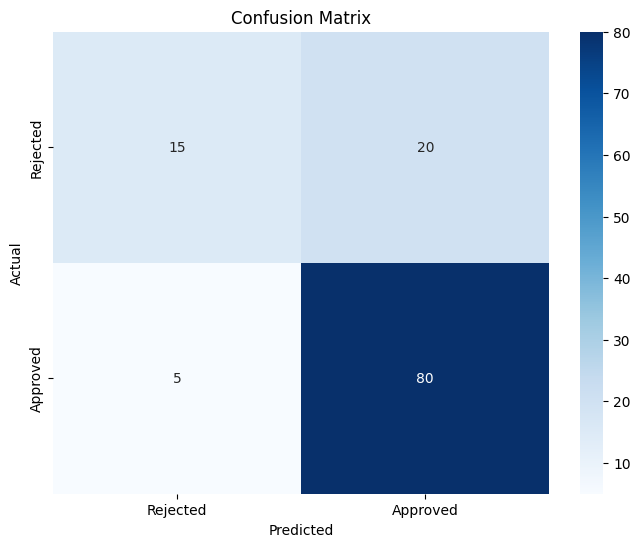

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

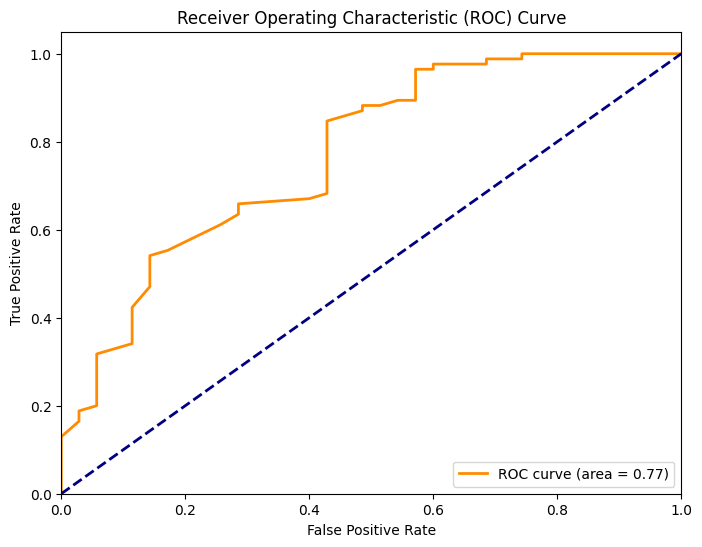

0.7700840336134454

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open('myloan_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)